In [17]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import gc

# Only run the following code once and once you have it downloaded, then you don't need to run it again. 

In [2]:
# # Download latest version
# # https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset
# path = kagglehub.dataset_download("ahmedshahriarsakib/usa-real-estate-dataset")

# print("Path to dataset files:", path)

#### NOTE: You will need to either move the file downloaded in previous cell to another folder or configure your system to have read permission to where it is downloaded. <br> 
For this tutorial I just moved it. 

In [3]:
df = pd.read_csv("./data/realtor-data.csv")

In [4]:
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [5]:
df.shape

(2226382, 12)

I notice that there is some missing data by looking at the price, bed, bath, etc. <br>

So, there is a few things that we can learn from looking at this dataset and a few things that we can go about filling out this data.

In [6]:
df = df.dropna(subset=['price'])

In [7]:
df.shape

(2224841, 12)

In [8]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [9]:
# ---------------------------
# Step 1: Load and preview data
# ---------------------------

# Example features and target
features = ['brokered_by', 'status', 'bed', 'bath', 'acre_lot', 'street', 'city', 'state', 'zip_code', 'house_size', 'prev_sold_date']
target = 'price'

X = df[features]
y = df[target]


In [10]:

# ---------------------------
# Step 2: Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# ---------------------------
# Step 3: Create and train the model
# ---------------------------
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'ready_to_build'

Oh, this is where we need to know our models. <br> 

Linear regression wants to see numbers for the input. So, we need to adjust our original dataset by converting string columns to numbers and try again. 

In [12]:
df_encoded = pd.get_dummies(df, columns=['city'], drop_first=True)


In [13]:
df_encoded.head()

,brokered_by,status,price,bed,bath,acre_lot,street,state,zip_code,house_size,...,city_Zoar,city_Zoarville,city_Zoe,city_Zolfo Springs,city_Zortman,city_Zumbro Falls,city_Zumbrota,city_Zuni,city_Zwingle,city_Zwolle
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Puerto Rico,601.0,920.0,...,False,False,False,False,False,False,False,False,False,False
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Puerto Rico,601.0,1527.0,...,False,False,False,False,False,False,False,False,False,False
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Puerto Rico,795.0,748.0,...,False,False,False,False,False,False,False,False,False,False
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Puerto Rico,731.0,1800.0,...,False,False,False,False,False,False,False,False,False,False
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Puerto Rico,680.0,NaN,...,False,False,False,False,False,False,False,False,False,False


In [14]:
df_encoded = pd.get_dummies(df_encoded, columns=['state'], drop_first=True)
df_encoded.head()

MemoryError: Unable to allocate 41.6 GiB for an array with shape (20088, 2224841) and data type bool

Noting that there is problems on the line above shows how columns can leave a dataset exploding into a REALLY large and sparse dataset. <br> 

So, let's start... again. 

In [15]:
unique_statuses = df['status'].unique()
print(unique_statuses)

['for_sale' 'ready_to_build' 'sold']


In [19]:
#### Cleaning up memory with python's garbage collector. 
del df_encoded
del X
del X_test
del X_train

del y
del y_test
del y_train


gc.collect()

52

Let's start with a simple model and then leave feature generation to a future iteration. We just need data. 

In [ ]:
# BACK TO Step 1: Load and preview data
# ---------------------------

# Example features and target
features = ['brokered_by', 'status', 'bed', 'bath', 'acre_lot', 'street', 'zip_code', 'house_size']
target = 'price'

# Quick mapping for first 
df['status'] = df['status'].map({
    'for_sale': 1,
    'ready_to_build': 2,
    'sold': 3
})

X = df[features]
y = df[target]

In [34]:
# Validate that we only have ints/doubles for the dataset. No Strings. 
X

,brokered_by,status,bed,bath,acre_lot,street,zip_code,house_size
0,103378.0,NaN,3.0,2.0,0.12,1962661.0,601.0,920.0
1,52707.0,NaN,4.0,2.0,0.08,1902874.0,601.0,1527.0
2,103379.0,NaN,2.0,1.0,0.15,1404990.0,795.0,748.0
3,31239.0,NaN,4.0,2.0,0.10,1947675.0,731.0,1800.0
4,34632.0,NaN,6.0,2.0,0.05,331151.0,680.0,NaN
...,...,...,...,...,...,...,...,...
2226377,23009.0,NaN,4.0,2.0,0.33,353094.0,99354.0,3600.0
2226378,18208.0,NaN,3.0,2.0,0.10,1062149.0,99354.0,1616.0
2226379,76856.0,NaN,6.0,3.0,0.50,405677.0,99354.0,3200.0
2226380,53618.0,NaN,2.0,1.0,0.09,761379.0,99354.0,933.0


In [35]:
# ---------------------------
# Not the best solution, for solving NaN's there are TONS of ways to handle this, but this is the simpliest. 
# ---------------------------

X = X.fillna(0)

In [36]:
X

,brokered_by,status,bed,bath,acre_lot,street,zip_code,house_size
0,103378.0,0.0,3.0,2.0,0.12,1962661.0,601.0,920.0
1,52707.0,0.0,4.0,2.0,0.08,1902874.0,601.0,1527.0
2,103379.0,0.0,2.0,1.0,0.15,1404990.0,795.0,748.0
3,31239.0,0.0,4.0,2.0,0.10,1947675.0,731.0,1800.0
4,34632.0,0.0,6.0,2.0,0.05,331151.0,680.0,0.0
...,...,...,...,...,...,...,...,...
2226377,23009.0,0.0,4.0,2.0,0.33,353094.0,99354.0,3600.0
2226378,18208.0,0.0,3.0,2.0,0.10,1062149.0,99354.0,1616.0
2226379,76856.0,0.0,6.0,3.0,0.50,405677.0,99354.0,3200.0
2226380,53618.0,0.0,2.0,1.0,0.09,761379.0,99354.0,933.0


In [38]:
# ---------------------------
# Step 2: Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# ---------------------------
# Step 3: Create and train the model
# ---------------------------
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:

# ---------------------------
# Step 4: Make predictions
# ---------------------------
y_pred = model.predict(X_test)

In [41]:

# ---------------------------
# Step 5: Evaluate the model
# ---------------------------
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 2069624815696.2498
R² Score: 0.03816573900862785


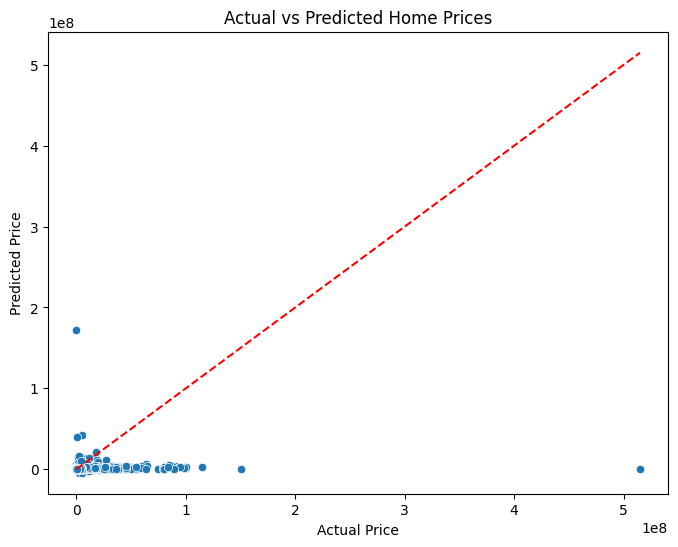

In [42]:
# ---------------------------
# Step 6: Plot predictions vs actual
# ---------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Home Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [43]:
coeffs = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print(coeffs.sort_values(by='Coefficient', ascending=False))

       Feature   Coefficient
3         bath  2.292326e+05
4     acre_lot  4.555330e+01
6     zip_code  2.021659e+00
5       street  1.647352e-02
7   house_size  4.312119e-04
1       status -2.357155e-07
0  brokered_by -4.797578e-01
2          bed -3.109884e+04


# Next steps would be looking at variables and then working on improving the model.

# Ways that I would be looking at for improving the model.
1. Removing the outliars for the dataset to find a general representation. 
2. Improve data cleaning and figure out how I can add additional Features for the training dataset. 